In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def multiple_formatter(denominator=4, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

In [44]:
n0 = np.logspace(0, 3, 400)
res = np.zeros((5,400))
a0 = [0., 1., 10., 20., 40.]
offset = [0., 0., 0.15, 0.23, 0.25]
colors = ['g', 'k', 'r', 'violet', 'b']
for i in range(5):
    n0_rel = n0/np.sqrt(1+a0[i]**2/2.)
    res[i] = 2*np.arctan(np.sqrt(n0_rel-1))+offset[i]

/tmp/ipykernel_15416/3758838072.py:8: RuntimeWarning: invalid value encountered in sqrt
  res[i] = 2*np.arctan(np.sqrt(n0_rel-1))+offset[i]


In [45]:
blue = np.zeros(15)
blue_x = np.zeros(15)
for i in range(blue.shape[0]):
    ind = int(150 + i*(res.shape[1]-150)/blue.shape[0])
    blue[i] = res[4][ind]
    blue_x[i] = n0[ind]

blue_x[3]=40
blue_x[4]=1000
blue_x[6]=85

pale_blue = [0.9*np.pi/4., 3.2*np.pi/4., 2.5*np.pi/4., 1.4*np.pi/4.]
pale_blue_x = [1, 1.8, 5., 7]

In [46]:
red = np.zeros(25)
red_x = np.zeros(25)
for i in range(blue.shape[0]):
    ind = int(100 + i*(res.shape[1]-100)/blue.shape[0])
    red[i] = res[2][ind]
    red_x[i] = n0[ind]

red_x[4]=1000
red_x[3]=18
red_x[2]=1000
red_x[1]=10

pale_red = [0.2*np.pi/4., 0.05*np.pi/4., 0.5*np.pi/4., 2.8*np.pi/4, 1.2*np.pi/4., 2.*np.pi/4.]
pale_red_x = [2., 2.5, 3., 4., 5., 6.]

In [47]:
black = np.zeros(25)
black_x = np.zeros(25)
for i in range(black.shape[0]):
    ind = int(30 + i*(res.shape[1]-30)/black.shape[0])
    black[i] = res[1][ind]
    black_x[i] = n0[ind]

black_x[6]=5.8
black_x[4]=4
black_x[3]=1000
black_x[2]=2.7
black_x[1]=1000
black_x[0]=1.8

In [48]:
green = np.zeros(25)
green_x = np.zeros(25)
for i in range(green.shape[0]):
    ind = int(1 + i*(res.shape[1]-1)/green.shape[0])
    green[i] = res[0][ind]
    green_x[i] = n0[ind]

In [49]:
n0 = np.logspace(0, 3, 400)
res = np.zeros((5,400))
a0 = [0., 1., 10., 20., 40.]
offset = [0., 0., 0.15, 0.23, 0.25]
colors = ['g', 'k', 'r', 'peru', 'b']
for i in range(5):
    n0_rel = n0/np.sqrt(1+a0[i]**2/2.)
    res[i] = 2*np.arctan(np.sqrt(n0_rel-1))

/tmp/ipykernel_15416/1624311492.py:8: RuntimeWarning: invalid value encountered in sqrt
  res[i] = 2*np.arctan(np.sqrt(n0_rel-1))


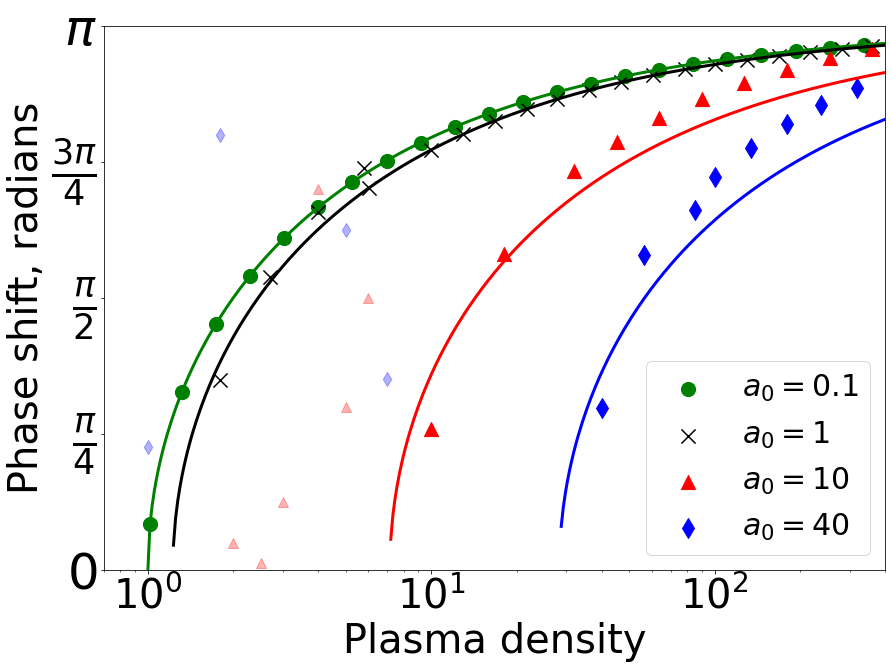

In [50]:
plt.figure(figsize=(14,10))
for i in range(5):
    if i == 3:
        continue
    plt.plot(n0, res[i], color=colors[i], lw=3)


plt.scatter(green_x, green, color='g', marker="o", s=200, label='$a_0=0.1$')

plt.scatter(black_x, black, color='k', marker="x", s=200, label='$a_0=1$')

plt.scatter(red_x, red, color='r', marker="^", s=200, label='$a_0=10$')
plt.scatter(pale_red_x, pale_red, color='r', marker="^", s=100, alpha=0.3)

plt.scatter(blue_x, blue, color='b', marker="d", s=200, label='$a_0=40$')
plt.scatter(pale_blue_x, pale_blue, color='b', marker="d", s=100, alpha=0.3)


plt.xscale('log')
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 4.))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.ylim(0, np.pi)
plt.xlim(0.7,400)
plt.yticks(fontsize=50);
plt.xticks(fontsize=40);
plt.ylabel("Phase shift, radians", fontsize=40)
plt.xlabel("Plasma density", fontsize=40)
plt.legend(fontsize=30, loc='lower right')
plt.savefig("phase_1.pdf", format='pdf')

In [10]:
from scipy.special import airy

In [11]:
n0 = np.logspace(-0.8, 4, 400)
offset_ramp = [0., 0., 0.05, 0.1, 0.15]
res_ramp = np.zeros((5,400))

for i in range(5):
    n0_rel = n0/np.sqrt(1.+a0[i]**2/2.)
    ai, aip, _, _ = airy(-n0_rel**(-2./3.))
    res_ramp[i] = 2*np.arctan(-n0_rel**(1./3.)*aip/ai )+offset_ramp[i]

In [12]:
black = np.zeros(25)
black_x = np.zeros(25)
for i in range(black.shape[0]):
    ind = int(30 + i*(res_ramp.shape[1]-30)/black.shape[0])
    black[i] = res_ramp[1][ind]
    black_x[i] = n0[ind]*9.5

black_also =  [1.5*np.pi/4, -1.1*np.pi/4, 1.7*np.pi/4, 3.5*np.pi/4]
black_also_x = [1.5, 1.8, 2.5, 3.1]

green = np.zeros(25)
green_x = np.zeros(25)
for i in range(green.shape[0]):
    ind = int(1 + i*(res_ramp.shape[1]-1)/green.shape[0])
    green[i] = res_ramp[0][ind]
    green_x[i] = n0[ind]*8

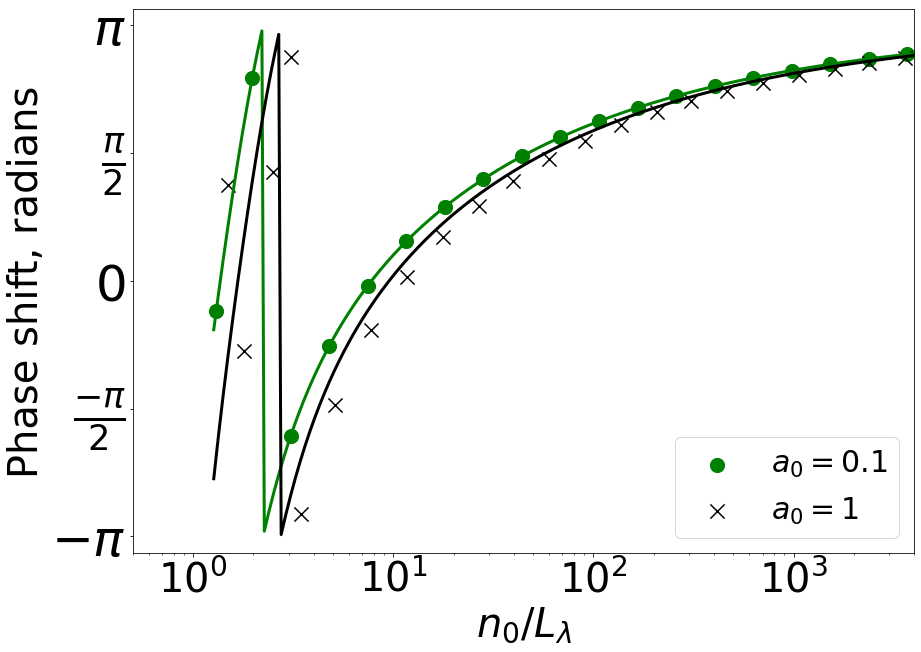

In [13]:
plt.figure(figsize=(14,10))
for i in range(2):
    plt.plot(n0*8, res_ramp[i], color=colors[i], lw=3)

plt.scatter(green_x, green, color='g', marker="o", s=200, label='$a_0=0.1$')

plt.scatter(black_x, black, color='k', marker="x", s=200, label='$a_0=1$')
plt.scatter(black_also_x, black_also, color='k', marker="x", s=200)

plt.xscale('log')
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2.))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.ylim(-np.pi-0.2, np.pi+0.2)
plt.xlim(0.5,4000)
plt.yticks(fontsize=50);
plt.xticks(fontsize=40);
plt.legend(fontsize=30, loc='lower right')
plt.ylabel("Phase shift, radians", fontsize=40)
plt.xlabel("$n_0/L_{\lambda}$", fontsize=40)
plt.savefig("phase_2.pdf", format='pdf')

In [14]:
st = [-0.8, 0.8, 0.1, 0.35, 0.6]
offset_ramp = [0., 0., 0.05, 0.1, 0.15]
res_ramp = np.zeros((5,400))
n0 = np.zeros((5, 400))
for i in range(5):
    n0[i] = np.logspace(st[i], 4, 400)
    n0_rel = n0[i]/np.sqrt(1.+a0[i]**2/2.)
    ai, aip, _, _ = airy(-n0_rel**(-2./3.))
    res_ramp[i] = 2*np.arctan(-n0_rel**(1./3.)*aip/ai )+offset_ramp[i]

In [15]:
blue = np.zeros(35)
blue_x = np.zeros(35)
for i in range(blue.shape[0]):
    ind = int(i*(res_ramp.shape[1])/blue.shape[0])
    blue[i] = res_ramp[4][ind]
    blue_x[i] = n0[4][ind]*8

pale_blue =  [-3.5*np.pi/4, -1.8*np.pi/4, 2.5*np.pi/4, -0.8*np.pi/4, 3.5*np.pi/4, -0.6*np.pi/4, 1.5*np.pi/4, -3*np.pi/4, -0.4*np.pi/4, -3.6*np.pi/4,-3*np.pi/4, 2.1*np.pi/4, 2*np.pi/4]
pale_blue_x = [0.5, 1.2, 2, 2.5, 3., 3.5, 4., 4.2, 5.7, 6.2, 10, 20, 30]

cyan = np.zeros(35)
cyan_x = np.zeros(35)
for i in range(cyan.shape[0]):
    ind = int(3 + i*(res_ramp.shape[1]-3)/cyan.shape[0])
    cyan[i] = res_ramp[3][ind]
    cyan_x[i] = n0[3][ind]*8

pale_cyan =  [-2.*np.pi/4, -1.*np.pi/4, -1.7*np.pi/4, 1.4*np.pi/4, -0.5*np.pi/4, -2.4*np.pi/4, 0*np.pi/4, -2.7*np.pi/4, -3*np.pi/4, -1.3*np.pi/4]
pale_cyan_x = [0.58, 1.26, 1.7, 2.6, 2.7, 4.0, 5., 5.5, 6., 10]

red = np.zeros(35)
red_x = np.zeros(35)
for i in range(red.shape[0]):
    ind = int(i*(res_ramp.shape[1])/red.shape[0])
    red[i] = res_ramp[2][ind]
    red_x[i] = n0[2][ind]*8

pale_red =  [-2.5*np.pi/4, -2.35*np.pi/4, -1.4*np.pi/4, -0.25*np.pi/4, -2.15*np.pi/4, 1.*np.pi/4, 2.65*np.pi/4, -3.4*np.pi/4, -1.7*np.pi/4]
pale_red_x = [0.55, 1.5, 1.7, 2.5, 2.8, 4.0, 5., 6., 7.]

In [16]:
st = [-0.8, 0.8, 0.1, 0.35, 0.6]
offset_ramp = [0., 0., 0.05, 0.1, 0.15]
res_ramp = np.zeros((5,400))
n0 = np.zeros((5, 400))
for i in range(5):
    n0[i] = np.logspace(st[i], 4, 400)
    n0_rel = n0[i]/np.sqrt(1.+a0[i]**2/2.)
    ai, aip, _, _ = airy(-n0_rel**(-2./3.))
    res_ramp[i] = 2*np.arctan(-n0_rel**(1./3.)*aip/ai )

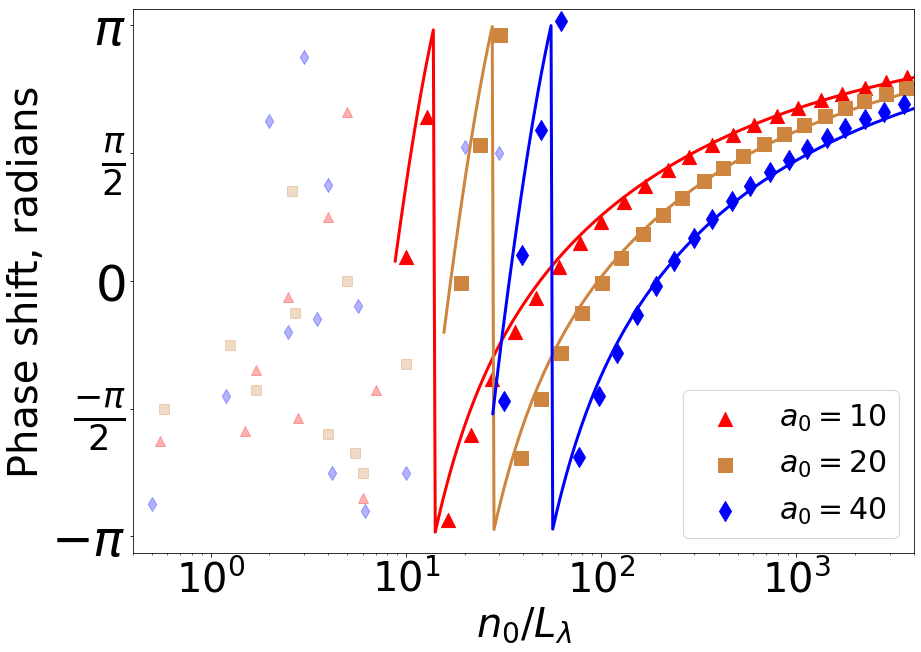

In [17]:
plt.figure(figsize=(14,10))
for i in [2,3,4]:
    plt.plot(n0[i]*7, res_ramp[i], color=colors[i], lw=3)


plt.scatter(red_x, red, color='r', marker="^", s=200, label='$a_0=10$')
plt.scatter(pale_red_x, pale_red, color='r', marker="^", s=100, alpha=0.3)

plt.scatter(cyan_x, cyan, color='peru', marker="s", s=200, label='$a_0=20$')
plt.scatter(pale_cyan_x, pale_cyan, color='peru', marker="s", s=100, alpha=0.3)

plt.scatter(blue_x, blue, color='b', marker="d", s=200, label='$a_0=40$')
plt.scatter(pale_blue_x, pale_blue, color='b', marker="d", s=100, alpha=0.3)


plt.xscale('log')
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2.))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.ylim(-np.pi-0.2, np.pi+0.2)
plt.xlim(0.4,4000)
plt.yticks(fontsize=50);
plt.xticks(fontsize=40);
plt.ylabel("Phase shift, radians", fontsize=40)
plt.xlabel("$n_0/L_{\lambda}$", fontsize=40)
plt.legend(fontsize=30, loc='lower right')
plt.savefig("phase_3.pdf", format='pdf')